In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from pprint import pprint

In [118]:
data_df=pd.read_csv("Google-Playstore-Full.csv",low_memory=False)
data_df=data_df[["App Name","Category","Rating","Reviews","Installs","Size","Price","Content Rating"]]
data_df.dropna()
data_df

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922,"100,000,000+",Varies with device,0,Everyone
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone
...,...,...,...,...,...,...,...,...
267047,Community Healthplex,HEALTH_AND_FITNESS,5,1,100+,4.2M,0,Everyone
267048,Pet ads: Buy & Sell,BUSINESS,2.599999905,5,500+,8.4M,0,Everyone
267049,Collectors Market: Buy & Sell,BUSINESS,3.285714388,7,"1,000+",7.9M,0,Everyone
267050,"Car Market, Buy & Sell",BUSINESS,5,1,"1,000+",8.2M,0,Everyone


In [119]:
data_df=data_df.rename(columns={"App_Name":"App Name"})
data_df

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922,"100,000,000+",Varies with device,0,Everyone
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone
...,...,...,...,...,...,...,...,...
267047,Community Healthplex,HEALTH_AND_FITNESS,5,1,100+,4.2M,0,Everyone
267048,Pet ads: Buy & Sell,BUSINESS,2.599999905,5,500+,8.4M,0,Everyone
267049,Collectors Market: Buy & Sell,BUSINESS,3.285714388,7,"1,000+",7.9M,0,Everyone
267050,"Car Market, Buy & Sell",BUSINESS,5,1,"1,000+",8.2M,0,Everyone


In [120]:
data_df["Size"].value_counts()

Varies with device    11726
11M                    7312
12M                    6362
13M                    5569
14M                    5266
                      ...  
715k                      1
10+                       1
6.1k                      1
119M                      1
311k                      1
Name: Size, Length: 1248, dtype: int64

In [121]:
data_df["Category"].value_counts()

EDUCATION              33394
TOOLS                  21592
BOOKS_AND_REFERENCE    21377
ENTERTAINMENT          20604
MUSIC_AND_AUDIO        17876
                       ...  
 T�rk Alfabesi             1
 ETEA & MDCAT              1
 Mexpost)                  1
 Tour Guide                1
 Podcasts                  1
Name: Category, Length: 67, dtype: int64

In [122]:
data_df = data_df.replace(
    {"GAME_PUZZLE": "GAME",
"GAME_CASUAL": "GAME",
"GAME_ARCADE": "GAME",
"GAME_ACTION": "GAME",
"GAME_SIMULATION": "GAME",
"GAME_CARD": "GAME",
"GAME_EDUCATIONAL": "GAME",
"GAME_ROLE_PLAYING": "GAME",
"GAME_STRATEGY": "GAME",
"GAME_RACING": "GAME",
"GAME_ADVENTURE": "GAME",
"GAME_SPORTS": "GAME",
"GAME_WORD": "GAME",
"GAME_BOARD": "GAME",
"GAME_CASINO": "GAME",
"GAME_TRIVIA": "GAME",
"GAME_MUSIC": "GAME",
})
value_counts = data_df["Category"].value_counts()
to_remove = value_counts[value_counts <= 1].index
data_df = data_df[~data_df.Category.isin(to_remove)]

In [123]:
cleaned_df = data_df
cleaned_df["Installs"].head()
cleaned_df["Installs"] = cleaned_df['Installs'].str.split("+").str[0]
cleaned_df["Installs"] = cleaned_df["Installs"].replace(',', "", regex=True)
cleaned_df["Category"] = cleaned_df["Category"].replace('_', " ", regex=True)
cleaned_df["Installs"] = cleaned_df["Installs"].astype(float)
cleaned_df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
0,DoorDash - Food Delivery,FOOD AND DRINK,4.548561573,305034,5000000.0,Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL AND LOCAL,4.400671482,1207922,100000000.0,Varies with device,0,Everyone
2,Peapod,SHOPPING,3.656329393,1967,100000.0,1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD AND DRINK,4.107232571,389154,10000000.0,16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD AND DRINK,4.647752285,2291,10000.0,Varies with device,$5.99,Everyone


In [124]:
cleaned_df = cleaned_df[cleaned_df["Rating"] != 'NEWS_AND_MAGAZINES']
cleaned_df = cleaned_df[cleaned_df["Category"] != 'Channel 2 News']
cleaned_df = cleaned_df[cleaned_df["Rating"] != 'GAME']
cleaned_df = cleaned_df.rename(columns={"Content Rating":"Number of Apps"})
cleaned_df = cleaned_df[cleaned_df["Rating"] != 'ENTERTAINMENT']
cleaned_df["Rating"] = cleaned_df["Rating"].astype(float)
cleaned_df["Reviews"] = cleaned_df["Reviews"].astype(float)
cleaned_df=cleaned_df.dropna()
cleaned_df.dtypes

App Name           object
Category           object
Rating            float64
Reviews           float64
Installs          float64
Size               object
Price              object
Number of Apps     object
dtype: object

In [125]:
groupby = cleaned_df.groupby(["Category"])
install_sum = groupby["Installs"].sum()/10000
install_sum

Category
ART AND DESIGN         3.702253e+04
AUTO AND VEHICLES      3.839429e+04
BEAUTY                 1.351792e+04
BOOKS AND REFERENCE    2.155583e+05
BUSINESS               1.489330e+05
COMICS                 1.935567e+04
COMMUNICATION          1.327480e+06
DATING                 1.484412e+04
EDUCATION              2.493372e+05
ENTERTAINMENT          7.363605e+05
EVENTS                 2.830650e+03
FINANCE                2.312669e+05
FOOD AND DRINK         6.119781e+04
GAME                   4.446148e+06
HEALTH AND FITNESS     2.138271e+05
HOUSE AND HOME         3.101829e+04
LIBRARIES AND DEMO     1.006233e+04
LIFESTYLE              2.199683e+05
MAPS AND NAVIGATION    1.222525e+05
MEDICAL                2.179170e+04
MUSIC AND AUDIO        5.836970e+05
NEWS AND MAGAZINES     3.712355e+05
PARENTING              8.989489e+03
PERSONALIZATION        4.186337e+05
PHOTOGRAPHY            9.358095e+05
PRODUCTIVITY           1.272585e+06
SHOPPING               3.274093e+05
SOCIAL             

In [126]:
review_sum = groupby["Reviews"].sum()/1000
review_sum

Category
ART AND DESIGN            4397.941
AUTO AND VEHICLES         4712.172
BEAUTY                    1332.254
BOOKS AND REFERENCE      45758.159
BUSINESS                 23529.893
COMICS                    4274.472
COMMUNICATION           340114.140
DATING                    4375.230
EDUCATION                52223.677
ENTERTAINMENT           118190.888
EVENTS                     280.911
FINANCE                  61733.457
FOOD AND DRINK           15785.266
GAME                   1622416.788
HEALTH AND FITNESS       42039.529
HOUSE AND HOME            4438.454
LIBRARIES AND DEMO        1701.190
LIFESTYLE                41293.395
MAPS AND NAVIGATION      35030.747
MEDICAL                   4839.789
MUSIC AND AUDIO         109840.154
NEWS AND MAGAZINES       39199.192
PARENTING                 2450.875
PERSONALIZATION          90251.812
PHOTOGRAPHY             160569.761
PRODUCTIVITY            106426.828
SHOPPING                 93576.848
SOCIAL                  287743.999
SPORTS     

In [127]:
category_count = groupby["Number of Apps"].count()
category_count

Category
ART AND DESIGN          1758
AUTO AND VEHICLES       2104
BEAUTY                   959
BOOKS AND REFERENCE    21377
BUSINESS               10230
COMICS                   505
COMMUNICATION           5486
DATING                   323
EDUCATION              33394
ENTERTAINMENT          20604
EVENTS                   615
FINANCE                10342
FOOD AND DRINK          3170
GAME                   22508
HEALTH AND FITNESS      7537
HOUSE AND HOME           925
LIBRARIES AND DEMO       612
LIFESTYLE              15034
MAPS AND NAVIGATION     4094
MEDICAL                 3736
MUSIC AND AUDIO        17876
NEWS AND MAGAZINES      8029
PARENTING                621
PERSONALIZATION        10544
PHOTOGRAPHY             7240
PRODUCTIVITY            9142
SHOPPING                5337
SOCIAL                  4744
SPORTS                  5585
TOOLS                  21592
TRAVEL AND LOCAL        6649
VIDEO PLAYERS           2717
WEATHER                 1643
Name: Number of Apps, dtype: int64

In [128]:
rating_mean = groupby["Rating"].mean()
rating_mean

Category
ART AND DESIGN         4.229019
AUTO AND VEHICLES      4.126978
BEAUTY                 4.296484
BOOKS AND REFERENCE    4.475828
BUSINESS               4.142819
COMICS                 4.269344
COMMUNICATION          4.238913
DATING                 4.045021
EDUCATION              4.347219
ENTERTAINMENT          4.257484
EVENTS                 4.329796
FINANCE                4.041860
FOOD AND DRINK         4.315585
GAME                   4.279671
HEALTH AND FITNESS     4.205069
HOUSE AND HOME         4.037074
LIBRARIES AND DEMO     4.221006
LIFESTYLE              4.296417
MAPS AND NAVIGATION    4.022079
MEDICAL                4.235055
MUSIC AND AUDIO        4.430913
NEWS AND MAGAZINES     4.228128
PARENTING              4.340115
PERSONALIZATION        4.435319
PHOTOGRAPHY            4.167316
PRODUCTIVITY           4.172169
SHOPPING               4.202634
SOCIAL                 4.361425
SPORTS                 4.285496
TOOLS                  4.142244
TRAVEL AND LOCAL       4.130067

In [137]:
average_installs = install_sum/category_count
average_installs

Category
ART AND DESIGN          21.059457
AUTO AND VEHICLES       18.248236
BEAUTY                  14.095853
BOOKS AND REFERENCE     10.083658
BUSINESS                14.558452
COMICS                  38.328052
COMMUNICATION          241.975869
DATING                  45.957018
EDUCATION                7.466526
ENTERTAINMENT           35.738714
EVENTS                   4.602683
FINANCE                 22.361909
FOOD AND DRINK          19.305304
GAME                   197.536335
HEALTH AND FITNESS      28.370319
HOUSE AND HOME          33.533283
LIBRARIES AND DEMO      16.441716
LIFESTYLE               14.631390
MAPS AND NAVIGATION     29.861372
MEDICAL                  5.832896
MUSIC AND AUDIO         32.652551
NEWS AND MAGAZINES      46.236835
PARENTING               14.475828
PERSONALIZATION         39.703502
PHOTOGRAPHY            129.255457
PRODUCTIVITY           139.202004
SHOPPING                61.347058
SOCIAL                 149.082314
SPORTS                  14.974169
TOOLS

In [ ]:
#groupby = cleaned_df.groupby(["Category"], as_index=False)
#install_table = groupby_table["Installs"].sum()
#review_table = groupby_table["Reviews"].sum()
#category_table = groupby_table["Number of Apps"].count()
#rating_table = groupby_table["Rating"].mean()

In [129]:
result = pd.merge(category_count, install_sum, on='Category', how='left')
result2 = pd.merge(result, rating_mean, on='Category', how='left')
result3 = pd.merge(result2, review_sum, on='Category', how='left')
result3

,Number of Apps,Installs,Rating,Reviews
Category,,,,
ART AND DESIGN,1758,3.702253e+04,4.229019,4397.941
AUTO AND VEHICLES,2104,3.839429e+04,4.126978,4712.172
BEAUTY,959,1.351792e+04,4.296484,1332.254
BOOKS AND REFERENCE,21377,2.155583e+05,4.475828,45758.159
BUSINESS,10230,1.489330e+05,4.142819,23529.893
COMICS,505,1.935567e+04,4.269344,4274.472
COMMUNICATION,5486,1.327480e+06,4.238913,340114.140
DATING,323,1.484412e+04,4.045021,4375.230
EDUCATION,33394,2.493372e+05,4.347219,52223.677


In [130]:
result3['Average Installs Per App'] = result3['Installs']/result3['Number of Apps']
result3

,Number of Apps,Installs,Rating,Reviews,Average Installs Per App
Category,,,,,
ART AND DESIGN,1758,3.702253e+04,4.229019,4397.941,21.059457
AUTO AND VEHICLES,2104,3.839429e+04,4.126978,4712.172,18.248236
BEAUTY,959,1.351792e+04,4.296484,1332.254,14.095853
BOOKS AND REFERENCE,21377,2.155583e+05,4.475828,45758.159,10.083658
BUSINESS,10230,1.489330e+05,4.142819,23529.893,14.558452
COMICS,505,1.935567e+04,4.269344,4274.472,38.328052
COMMUNICATION,5486,1.327480e+06,4.238913,340114.140,241.975869
DATING,323,1.484412e+04,4.045021,4375.230,45.957018
EDUCATION,33394,2.493372e+05,4.347219,52223.677,7.466526


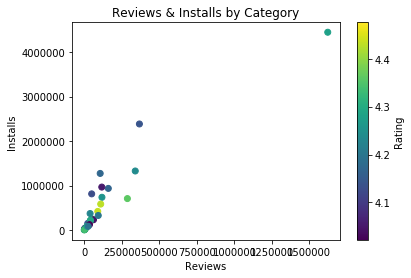

In [155]:
plt.scatter(result3['Reviews'],result3['Installs'],c=result3['Rating'])
clb = plt.colorbar()
plt.xlabel("Reviews")
plt.ylabel("Installs")
clb.set_label("Rating")
plt.title('Reviews & Installs by Category')
plt.show()

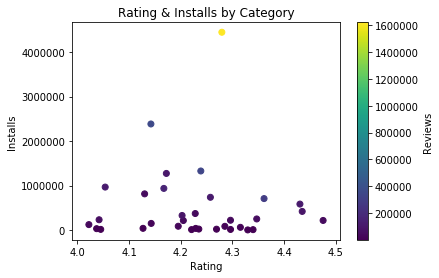

In [153]:
plt.scatter(result3['Rating'],result3['Installs'],c=result3['Reviews'])
clb = plt.colorbar()
plt.xlabel("Rating")
plt.ylabel("Installs")
clb.set_label("Reviews")
plt.title('Rating & Installs by Category')
plt.show()

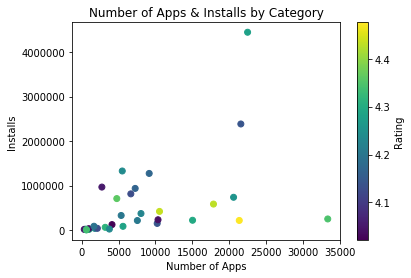

In [158]:
plt.scatter(result3['Number of Apps'],result3['Installs'],c=result3['Rating'])
clb = plt.colorbar()
plt.xlabel("Number of Apps")
plt.ylabel("Installs")
clb.set_label("Rating")
plt.title('Number of Apps & Installs by Category')
plt.show()

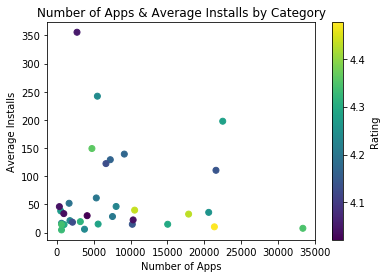

In [159]:
plt.scatter(result3['Number of Apps'],result3['Average Installs Per App'],c=result3['Rating'])
clb = plt.colorbar()
plt.xlabel("Number of Apps")
plt.ylabel("Average Installs")
clb.set_label("Rating")
plt.title('Number of Apps & Average Installs by Category')
plt.show()

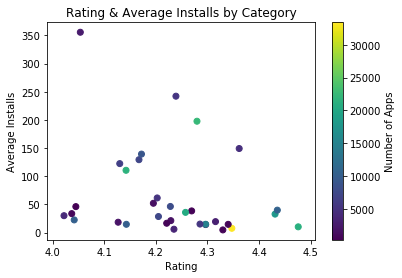

In [160]:
plt.scatter(result3['Rating'],result3['Average Installs Per App'],c=result3['Number of Apps'])
clb = plt.colorbar()
plt.xlabel("Rating")
plt.ylabel("Average Installs")
clb.set_label("Number of Apps")
plt.title('Rating & Average Installs by Category')
plt.show()

In [132]:
category_key=groupby.groups.keys()
category_key

dict_keys(['ART AND DESIGN', 'AUTO AND VEHICLES', 'BEAUTY', 'BOOKS AND REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD AND DRINK', 'GAME', 'HEALTH AND FITNESS', 'HOUSE AND HOME', 'LIBRARIES AND DEMO', 'LIFESTYLE', 'MAPS AND NAVIGATION', 'MEDICAL', 'MUSIC AND AUDIO', 'NEWS AND MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL AND LOCAL', 'VIDEO PLAYERS', 'WEATHER'])

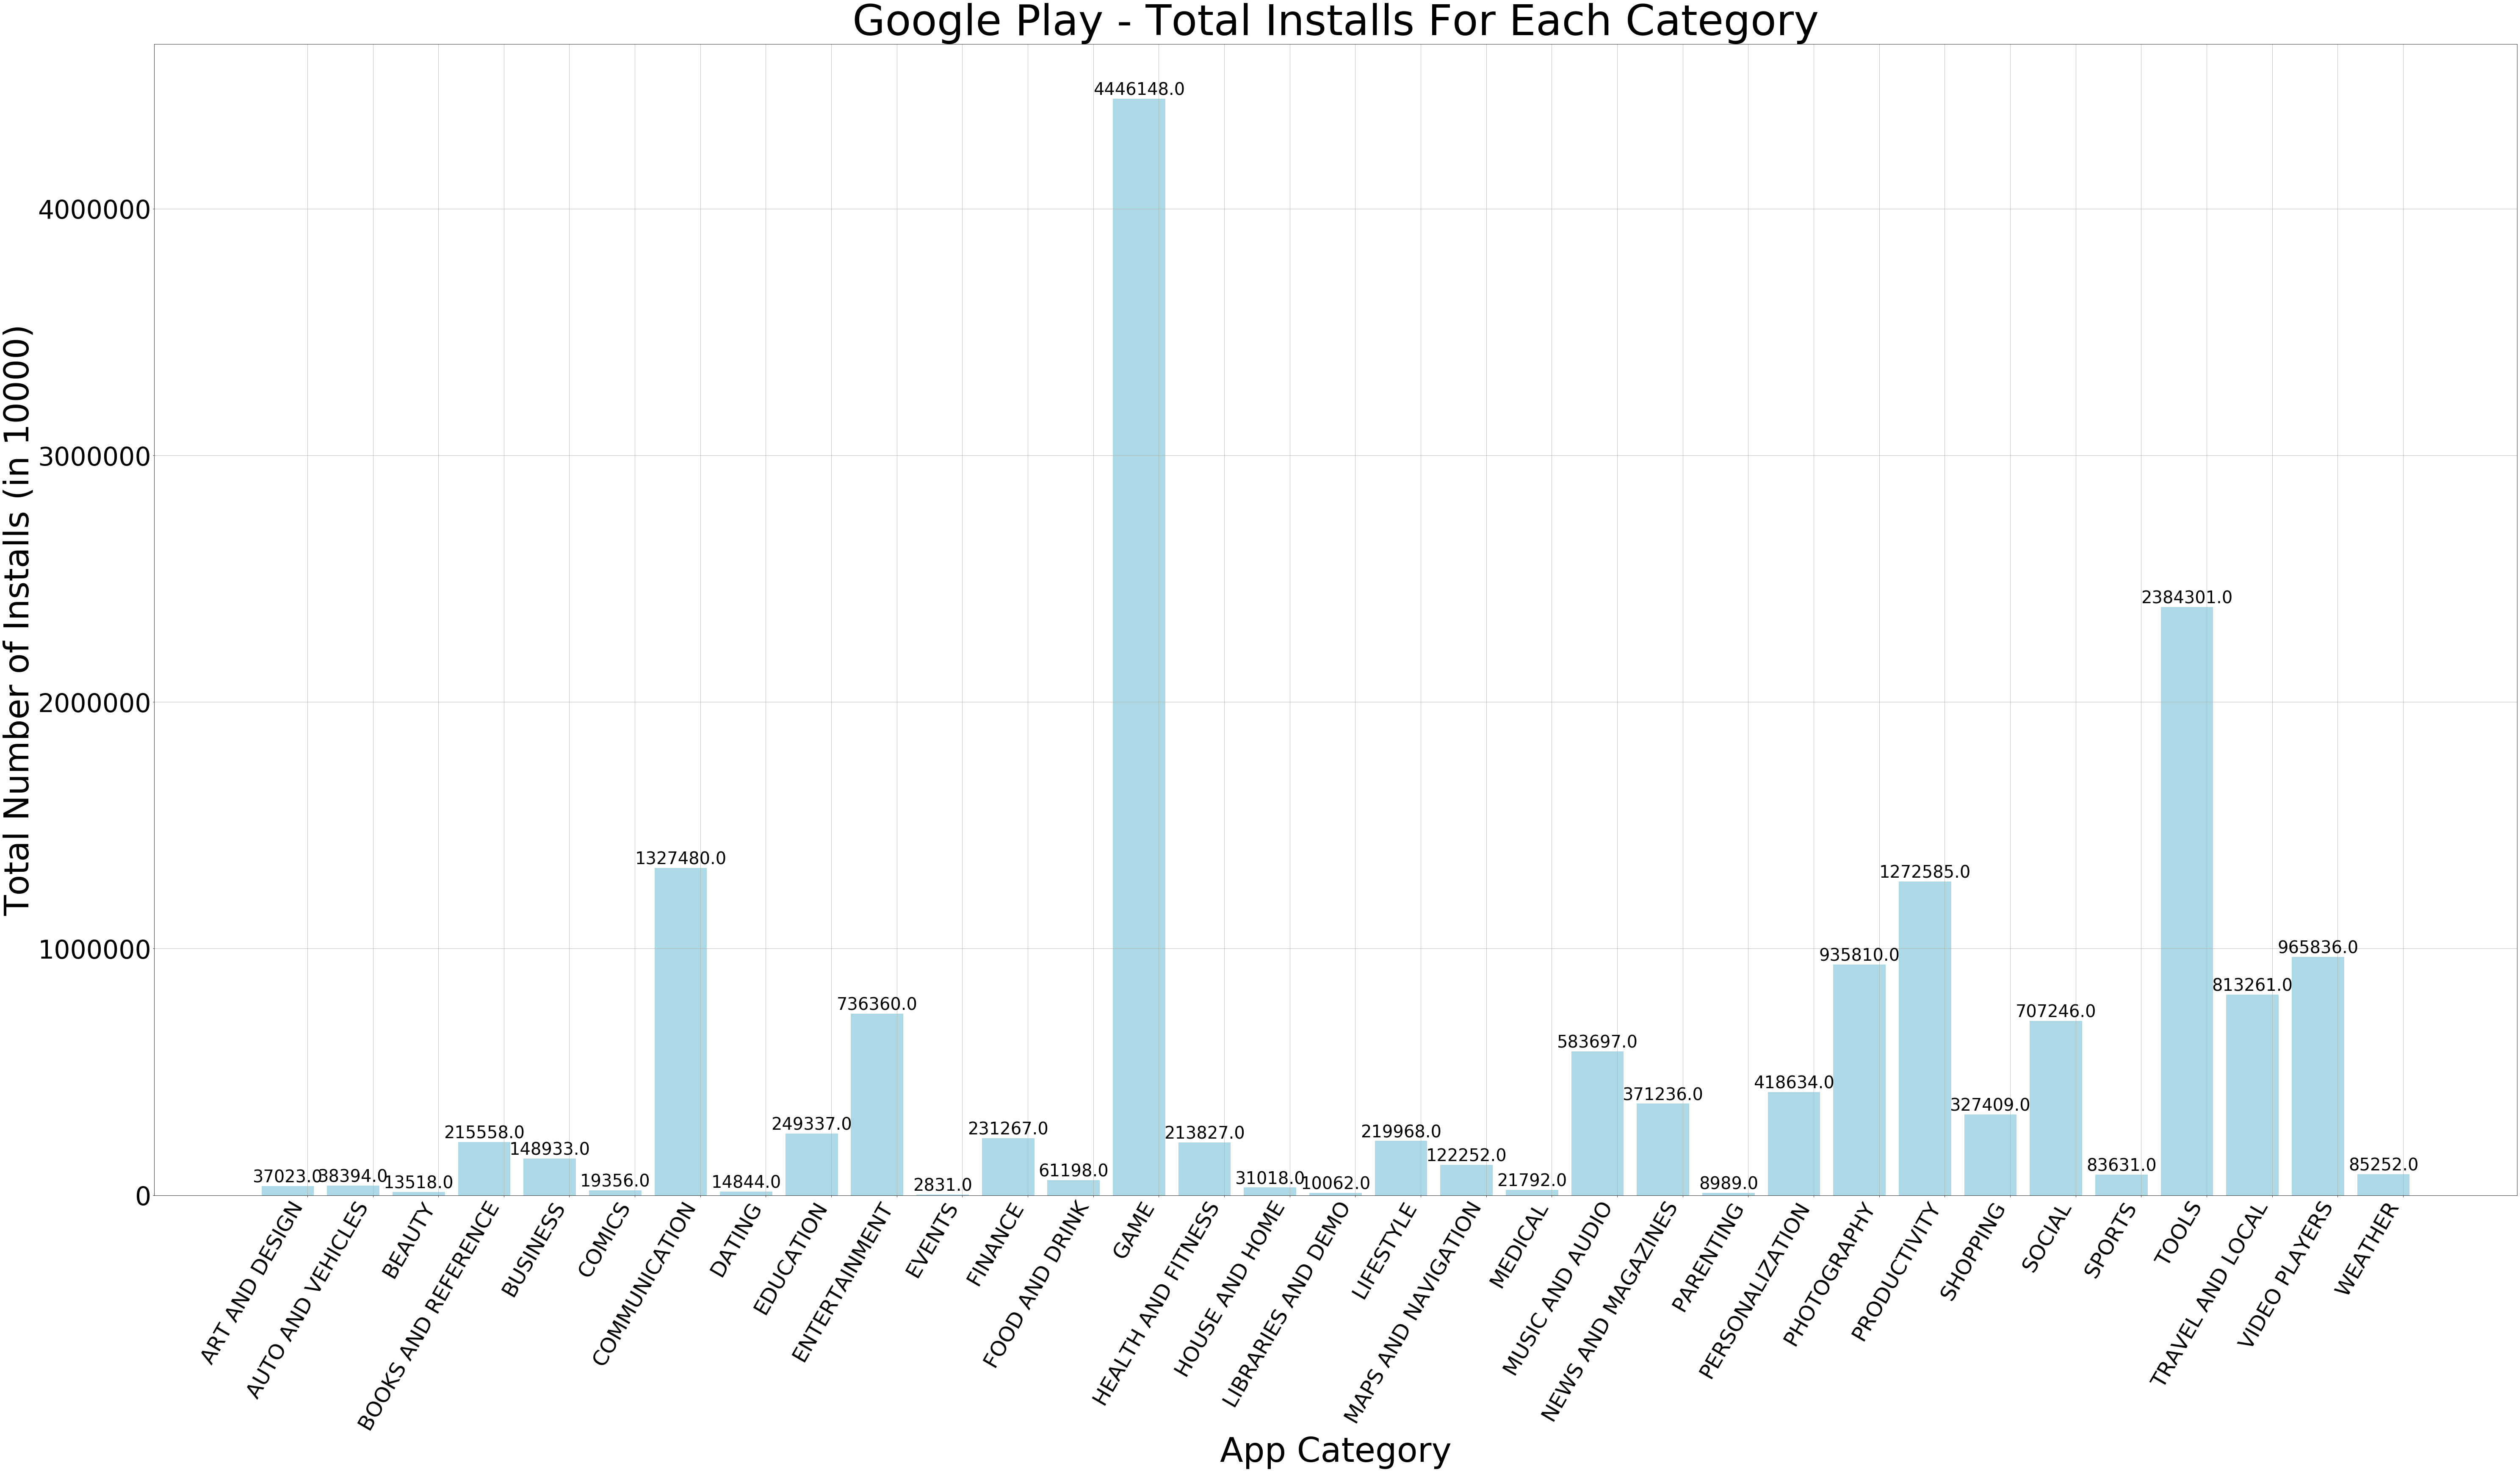

In [147]:
fig, ax = plt.subplots(figsize=(100,50))
x_index = np.arange(len(groupby["Installs"]))  
total_installs = ax.bar(x_index[0:], install_sum[0:], color='lightblue')
ax.set_title('Google Play - Total Installs For Each Category',fontsize=100)
ax.set_ylabel('Total Number of Installs (in 10000)',fontsize=80)
ax.set_xlabel('App Category',fontsize=80)
ax.set_xticks(x_index+0.3)
ax.tick_params(axis="y", labelsize=60)
ax.set_xticklabels(category_key,fontsize=50)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
def label(numbers,fontsize,labelheight,roundnumber):
    for x in numbers:
        height = x.get_height()
        xloc=x.get_x() + x.get_width() / 2
        label=(f'{round(height,roundnumber)}')
        ax.text(xloc,height+labelheight,label,ha='center', va='bottom',color="black",fontsize=fontsize)
label(total_installs,40,100,0)

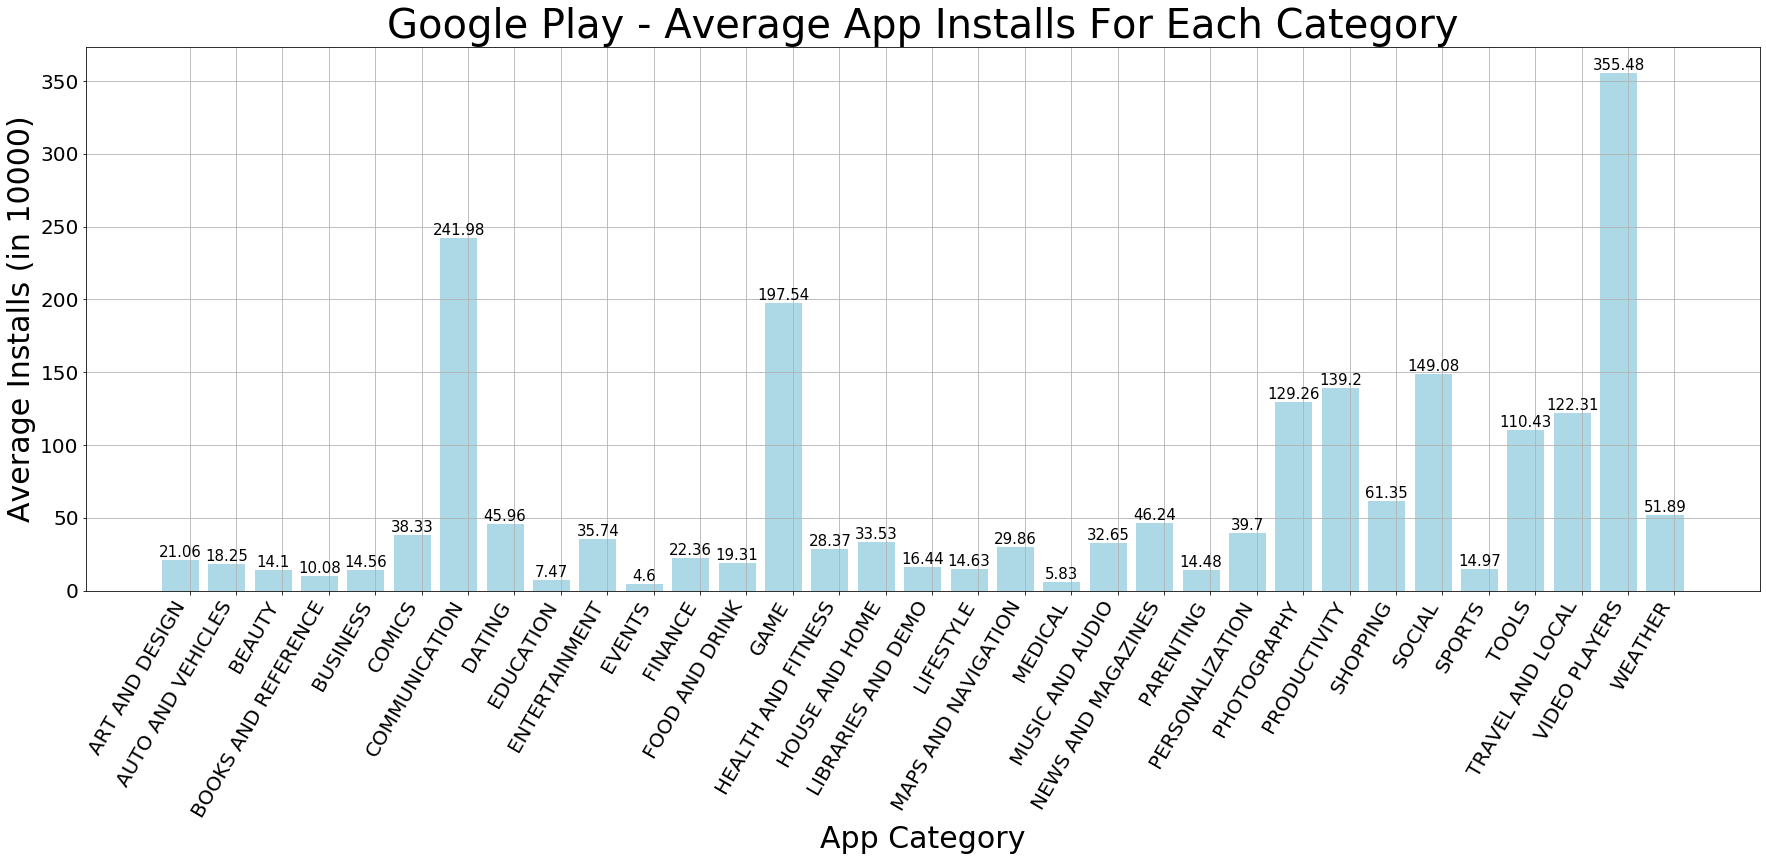

In [156]:
fig,ax = plt.subplots(figsize=(30,10))
x_index = np.arange(len(average_installs))  
avg_installs = ax.bar(x_index[0:], average_installs[0:], color='lightblue')
ax.set_title('Google Play - Average App Installs For Each Category',fontsize=40)
ax.set_ylabel('Average Installs (in 10000)',fontsize=30)
ax.set_xlabel('App Category',fontsize=30)
ax.set_xticks(x_index+0.2)
ax.tick_params(axis="y", labelsize=20)
ax.set_xticklabels(category_key,fontsize=20)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
label(avg_installs,15,0.05,2)